* This Project is initiated for a company called IFS that provides apartment services across various locations, geographically 
spread across thousands of square kilometers. This company provides apartment services such as Plumbing, Electrical, 
Air-conditioning, Masonry and Telecom works. They have a team of Field Service engineers that are located in various places 
in the geography and have remote access to the central office to get information about day to day service schedules. These 
engineers or technicians have electronic devices like tabs or laptops, which they use to get the daily service information. 
With this information to go to the customer sites carry out the necessary services and update the completion information from 
their devices back to the office. These technicians get their parts, accessories and others required for their activities via 
courier services. They can also get in touch with the central office for any troubleshooting help or coordination of any OEM help.
* Now they have competition, the new company is promising aggressive service clauses such as very difficult to achieve equipment 
downtime, and longer life for older equipment to quote just some of them. While wondering if these are realistic and achievable, 
IFS does not want to take the new comers for granted, they want to understand if their metrics are comparable and even possible 
to exceed. For this the company needs a thorough analysis of performance information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline



In [2]:
df = pd.read_csv('C:/Users/Acer/Desktop/IFS Data/ifs_data.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Company Code,Service Work Order Number,Customer Name,Location Address 1,Location Address 2,ZIP Code,Customer Phone Number,Reported Date/Time,Planned Start Date/Time,Actual Start Date/Time,...,Solution Statement,Service Technician,Office Support Contact,Currency,Order Amount,Contract Discount,Service tax Amount,Bill No,Bill Date/Time,Service Contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18T08:47:54,2018-09-19T11:48:54,2018-09-19T11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419,142,128,IFS-100001,2018-09-22T12:36:43,414
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27T09:03:56,2018-09-28T09:58:23,2018-09-28T09:58:23,...,our engineer will fix it,John,877-586-3224,$-,1027,103,92,IFS-100002,2018-10-04T12:24:50,415
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27T07:16:17,2018-09-28T09:59:16,2018-09-28T09:59:16,...,our engineer will fix it,John,877-586-3224,$-,2898,290,261,IFS-100003,2018-10-02T09:57:55,416
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27T08:40:41,2018-09-28T10:04:22,2018-09-28T10:04:22,...,our engineer will fix it,Brad,877-586-3224,$-,1388,139,125,IFS-100004,2018-10-02T13:30:18,417
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27T08:33:28,2018-09-28T10:12:44,2018-09-28T10:12:44,...,our engineer will fix it,Brad,877-586-3224,$-,746,75,67,IFS-100005,2018-10-04T10:15:10,418


In [4]:
df.shape

(20000, 25)

In [5]:
# change the column names
df.rename(index=str, columns={'Company Code': 'com_code' ,  'Bill No':'bill_no',
                              'Customer Name' : 'cust_name' , 'Location Address 1' : 'loc_add',
                              'Location Address 2' : 'city' , 'ZIP Code' : 'zip_code',
                              'Customer Phone Number' : 'cust_phn_no' , 'Reported Date/Time' : 'report_dt',
                              'Planned Start Date/Time' : 'plan_strt_dt' , 'Actual Start Date/Time':'actual_strt_dt',
                              'Planned Finish Date/Time':'plan_fnsh_dt' , 'Actual Finish Date/Time':'actual_fnsh_dt',
                              'Order Description':'order_desc' , 'Asset/Equipment Details':'asset_req',
                              'Problem Statement':'prob_stmnt' , 'Solution Statement':'sol_stmnt',
                              'Service Technician':'serv_tech_head' , 'Office Support Contact':'office_phn_no',
                              'Currency':'currency' , 'Order Amount':'order_amt',
                              'Contract Discount':'contract_disc' , 'Service tax Amount':'serv_tax_amt',
                              'Bill Date/Time':'bill_dt' , 'Service Contract':'serv_contract'}, inplace=True)

In [6]:
df.head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18T08:47:54,2018-09-19T11:48:54,2018-09-19T11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419,142,128,IFS-100001,2018-09-22T12:36:43,414
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27T09:03:56,2018-09-28T09:58:23,2018-09-28T09:58:23,...,our engineer will fix it,John,877-586-3224,$-,1027,103,92,IFS-100002,2018-10-04T12:24:50,415
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27T07:16:17,2018-09-28T09:59:16,2018-09-28T09:59:16,...,our engineer will fix it,John,877-586-3224,$-,2898,290,261,IFS-100003,2018-10-02T09:57:55,416
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27T08:40:41,2018-09-28T10:04:22,2018-09-28T10:04:22,...,our engineer will fix it,Brad,877-586-3224,$-,1388,139,125,IFS-100004,2018-10-02T13:30:18,417
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27T08:33:28,2018-09-28T10:12:44,2018-09-28T10:12:44,...,our engineer will fix it,Brad,877-586-3224,$-,746,75,67,IFS-100005,2018-10-04T10:15:10,418


## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null object
plan_strt_dt                  20000 non-null object
actual_strt_dt                20000 non-null object
plan_fnsh_dt                  20000 non-null object
actual_fnsh_dt                20000 non-null object
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head                20000 non-null object
office_phn_n

## Check missing values for each column

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

serv_contract                 0
actual_fnsh_dt                0
Service Work Order Number     0
cust_name                     0
loc_add                       0
city                          0
zip_code                      0
cust_phn_no                   0
report_dt                     0
plan_strt_dt                  0
actual_strt_dt                0
plan_fnsh_dt                  0
order_desc                    0
bill_dt                       0
asset_req                     0
prob_stmnt                    0
sol_stmnt                     0
serv_tech_head                0
office_phn_no                 0
currency                      0
order_amt                     0
contract_disc                 0
serv_tax_amt                  0
bill_no                       0
com_code                      0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract


In [10]:
df['report_dt'] = pd.to_datetime(df['report_dt'])
df['plan_strt_dt'] = pd.to_datetime(df['plan_strt_dt'])
df['actual_strt_dt'] = pd.to_datetime(df['actual_strt_dt'])
df['plan_fnsh_dt'] = pd.to_datetime(df['plan_fnsh_dt'])
df['actual_fnsh_dt'] = pd.to_datetime(df['actual_fnsh_dt'])
df['bill_dt'] = pd.to_datetime(df['bill_dt'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null datetime64[ns]
plan_strt_dt                  20000 non-null datetime64[ns]
actual_strt_dt                20000 non-null datetime64[ns]
plan_fnsh_dt                  20000 non-null datetime64[ns]
actual_fnsh_dt                20000 non-null datetime64[ns]
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head          

In [12]:
df['order_amt'] = df['order_amt'].astype(np.float64)
df['contract_disc'] = df['contract_disc'].astype(np.float64)
df['serv_tax_amt'] = df['serv_tax_amt'].astype(np.float64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
com_code                      20000 non-null object
Service Work Order Number     20000 non-null object
cust_name                     20000 non-null object
loc_add                       20000 non-null object
city                          20000 non-null object
zip_code                      20000 non-null object
cust_phn_no                   20000 non-null object
report_dt                     20000 non-null datetime64[ns]
plan_strt_dt                  20000 non-null datetime64[ns]
actual_strt_dt                20000 non-null datetime64[ns]
plan_fnsh_dt                  20000 non-null datetime64[ns]
actual_fnsh_dt                20000 non-null datetime64[ns]
order_desc                    20000 non-null object
asset_req                     20000 non-null object
prob_stmnt                    20000 non-null object
sol_stmnt                     20000 non-null object
serv_tech_head          

In [14]:
df.head()

,com_code,Service Work Order Number,cust_name,loc_add,city,zip_code,cust_phn_no,report_dt,plan_strt_dt,actual_strt_dt,...,sol_stmnt,serv_tech_head,office_phn_no,currency,order_amt,contract_disc,serv_tax_amt,bill_no,bill_dt,serv_contract
0,I-1,A-1001,Wesley Mason,252 Jifina Avenue,Sejwegca,R6Z 4I1,(444) 965-4216,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-19 11:48:54,...,our engineer will fix it,Jack,877-586-3224,$-,1419.0,142.0,128.0,IFS-100001,2018-09-22 12:36:43,414
1,I-1,A-1002,Eula Hicks,490 Cinu Parkway,Jipuri,A6Q 1S9,(636) 481-4722,2018-09-27 09:03:56,2018-09-28 09:58:23,2018-09-28 09:58:23,...,our engineer will fix it,John,877-586-3224,$-,1027.0,103.0,92.0,IFS-100002,2018-10-04 12:24:50,415
2,I-1,A-1003,Johnny Watts,931 Keheg Circle,Uhezufen,L8G 2U8,(416) 917-2514,2018-09-27 07:16:17,2018-09-28 09:59:16,2018-09-28 09:59:16,...,our engineer will fix it,John,877-586-3224,$-,2898.0,290.0,261.0,IFS-100003,2018-10-02 09:57:55,416
3,I-1,A-1004,Eugene Blair,799 Kofku Lane,Heisla,R2J 1V2,(969) 284-5035,2018-09-27 08:40:41,2018-09-28 10:04:22,2018-09-28 10:04:22,...,our engineer will fix it,Brad,877-586-3224,$-,1388.0,139.0,125.0,IFS-100004,2018-10-02 13:30:18,417
4,I-1,A-1005,Floyd Willis,1898 Hidge Parkway,Vijipab,T1V 6Z2,(809) 930-1785,2018-09-27 08:33:28,2018-09-28 10:12:44,2018-09-28 10:12:44,...,our engineer will fix it,Brad,877-586-3224,$-,746.0,75.0,67.0,IFS-100005,2018-10-04 10:15:10,418


## Deleting unnecessary features from the dataset

###  Some features like "com_code" , "cust_name" , "loc_add" , "zip_code" , "cust_phn_no" , "currency" , "office_phn_no" , "serv_tech_head" , "prob_stmnt" and "sol_stmnt" have no such importance in the analysis work so, we are dropping these features.

### And by analyzing the data we got to know that "plan_strt_dt" is similar to "actual_strt_dt" so, we are dropping "plan_strt_dt"

In [15]:
df.drop(['com_code','cust_name','loc_add','zip_code','cust_phn_no','plan_strt_dt','currency','office_phn_no','serv_tech_head','prob_stmnt','sol_stmnt'], axis=1, inplace=True)

In [16]:
df_new = df

In [17]:
df_new.shape

(20000, 14)

In [18]:
df_new.describe().round(2)

,order_amt,contract_disc,serv_tax_amt,serv_contract
count,20000.00,20000.00,20000.00,20000.00
mean,1531.01,153.15,137.84,4761.10
std,852.70,85.27,76.74,2743.58
min,50.00,5.00,5.00,414.00
25%,794.00,79.00,72.00,2384.75
50%,1543.00,154.00,139.00,4517.50
75%,2266.00,227.00,204.00,6995.00
max,3000.00,300.00,270.00,10329.00


## Add the column -> bill_amt

In [19]:
df_new['bill_amt'] = df_new['order_amt'] - df_new['contract_disc'] + df_new['serv_tax_amt']

In [20]:
df_new['bill_amt'] = df_new['bill_amt'].astype(np.float64)

### After calculating Billing Amount we don't need features like "order_amt","contract_disc","serv_tax_amt" so, we dropped them.

* the "Contract Discount" is 10% for all users
* the "Service Tax" is also 10% for all users

In [21]:
df_new.drop(['order_amt','contract_disc','serv_tax_amt'], axis=1, inplace=True)

In [22]:
df_new.head()

,Service Work Order Number,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,bill_no,bill_dt,serv_contract,bill_amt
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,Plumbing,Y,IFS-100001,2018-09-22 12:36:43,414,1405.0
1,A-1002,Jipuri,2018-09-27 09:03:56,2018-09-28 09:58:23,2018-10-04 09:58:00,2018-10-04 12:24:50,Others,N,IFS-100002,2018-10-04 12:24:50,415,1016.0
2,A-1003,Uhezufen,2018-09-27 07:16:17,2018-09-28 09:59:16,2018-10-04 09:59:00,2018-10-02 09:57:55,Others,N,IFS-100003,2018-10-02 09:57:55,416,2869.0
3,A-1004,Heisla,2018-09-27 08:40:41,2018-09-28 10:04:22,2018-10-04 10:04:00,2018-10-02 13:30:18,Masonry,Y,IFS-100004,2018-10-02 13:30:18,417,1374.0
4,A-1005,Vijipab,2018-09-27 08:33:28,2018-09-28 10:12:44,2018-10-04 10:12:00,2018-10-04 10:15:10,Masonry,N,IFS-100005,2018-10-04 10:15:10,418,738.0


# Exploratory Data Analysis (EDA)

## Checking Co-relation between each and every feature of the dataset

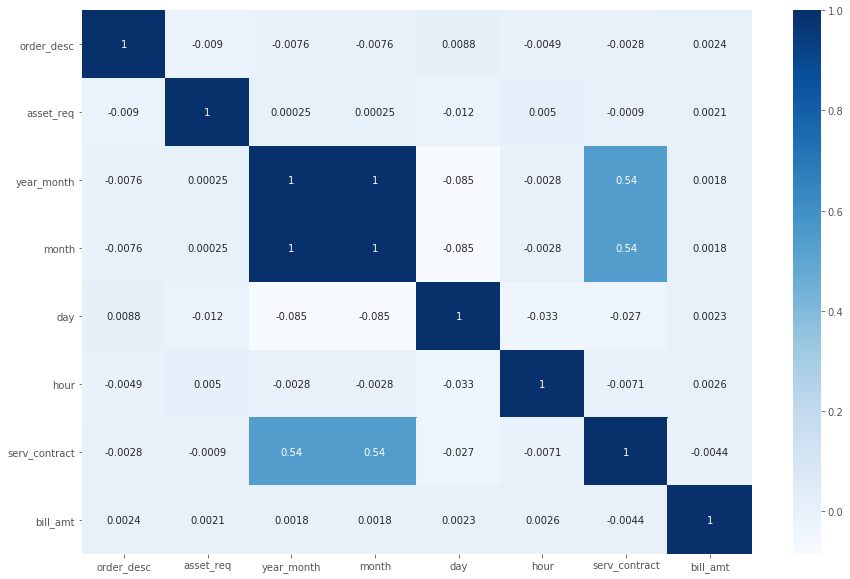

In [50]:
corr = df_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues',annot=True)

## How many orders made by the customers?

In [25]:
df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_no'].count().head()

,serv_contract,city,bill_no
0,414,Sejwegca,1
1,415,Jipuri,3
2,416,Uhezufen,2
3,417,Heisla,3
4,418,Vijipab,3


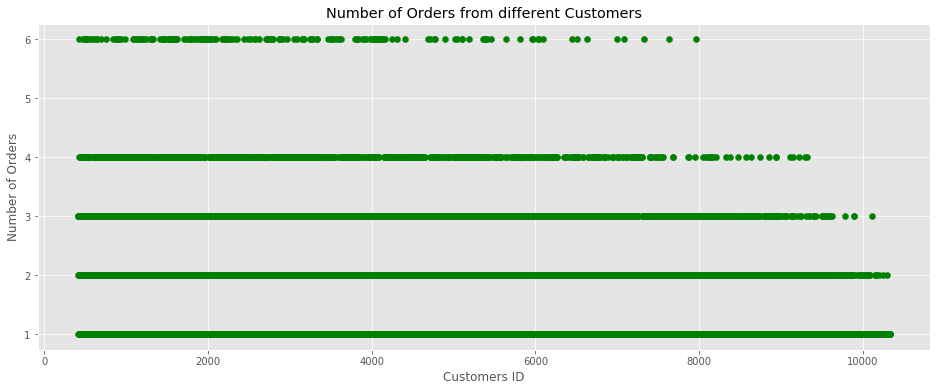

In [26]:
orders = df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_no'].count()

style.use('ggplot')
plt.subplots(figsize=(16,6))
plt.scatter(orders.serv_contract,orders.bill_no, color='g')#, align='center')
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders from different Customers')
plt.show()

##  Check TOP 5 most number of orders

In [27]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='bill_no', ascending=False).head()

The TOP 5 customers with most number of orders...


,serv_contract,city,bill_no
573,987,Jatoozi,6
678,1092,Tuhoceto,6
1662,2076,Olugaedu,6
3046,3460,Muhlulat,6
1853,2267,Wutoel,6


## How much money spent by the customers?

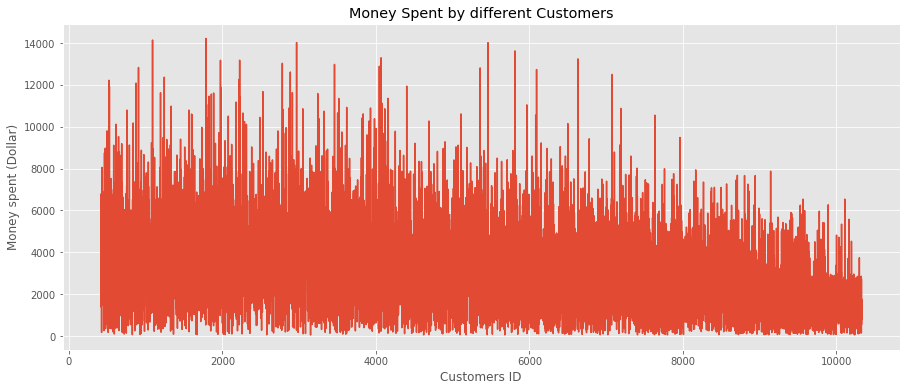

In [28]:
money_spent = df_new.groupby(by=['serv_contract','city'], as_index=False)['bill_amt'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.serv_contract, money_spent.bill_amt)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent by different Customers')
plt.show()

## Check TOP 5 highest money spent 


In [29]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='bill_amt', ascending=False).head()

The TOP 5 customers with highest money spent...


,serv_contract,city,bill_amt
1372,1786,Wizneev,14220.0
675,1089,Wukpeovu,14145.0
2552,2966,Keefom,14025.0
5046,5460,Dunonoc,14020.0
5397,5811,Zarublic,13625.0


# Discover patterns for Number of Orders

## How many orders (per month)?

In [30]:
df_new.insert(loc=8, column='year_month', value=df_new['report_dt'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=9, column='month', value=df_new.report_dt.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=10, column='day', value=(df_new.report_dt.dt.dayofweek)+1)
df_new.insert(loc=11, column='hour', value=df_new.report_dt.dt.hour)

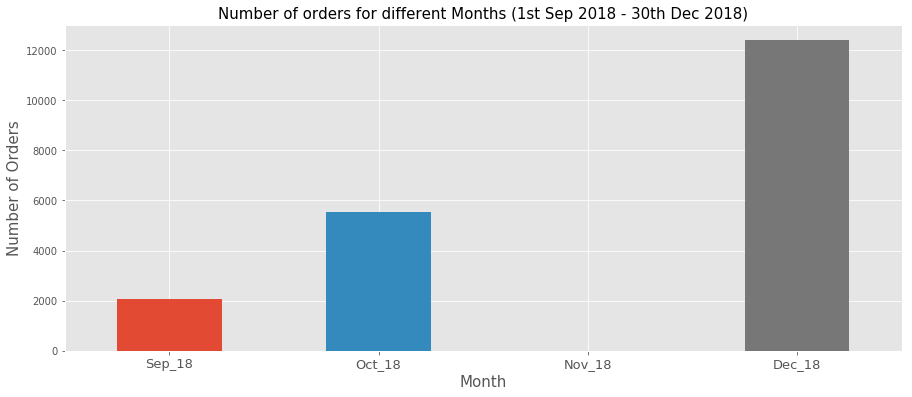

In [31]:
ax = df_new.groupby('bill_no')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Sep 2018 - 30th Dec 2018)',fontsize=15)
ax.set_xticklabels(('Sep_18','Oct_18','Nov_18','Dec_18'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [32]:
df_new.groupby('bill_no')['day'].unique().value_counts().sort_index()

[1]    3694
[2]    3414
[3]    3195
[4]    3663
[5]    1655
[6]    1049
[7]    3330
Name: day, dtype: int64

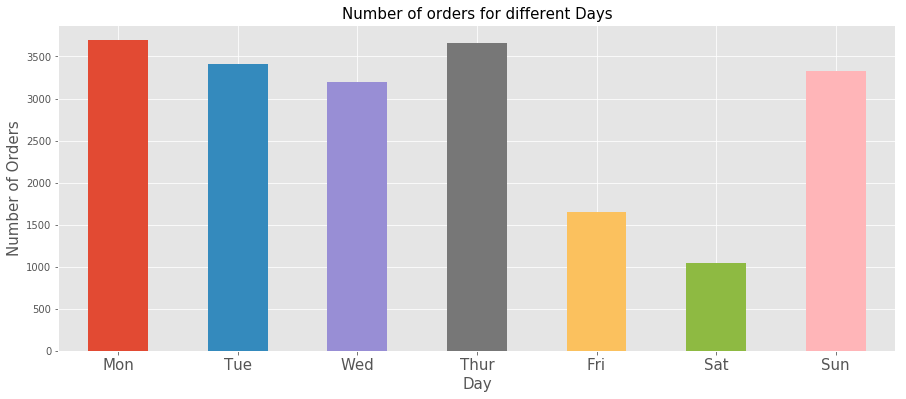

In [33]:
ax = df_new.groupby('bill_no')['day'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [34]:
df_new.groupby('bill_no')['hour'].unique().value_counts().iloc[:-1].sort_index()

[0]       94
[1]       44
[2]       31
[4]       51
[5]       67
[6]      216
[7]      654
[8]     1306
[9]     1700
[10]    1841
[11]    1882
[12]    1757
[13]    1703
[14]    1675
[15]    1624
[16]    1525
[17]    1076
[18]     878
[19]     580
[20]     444
[21]     380
[22]     256
[23]     185
Name: hour, dtype: int64

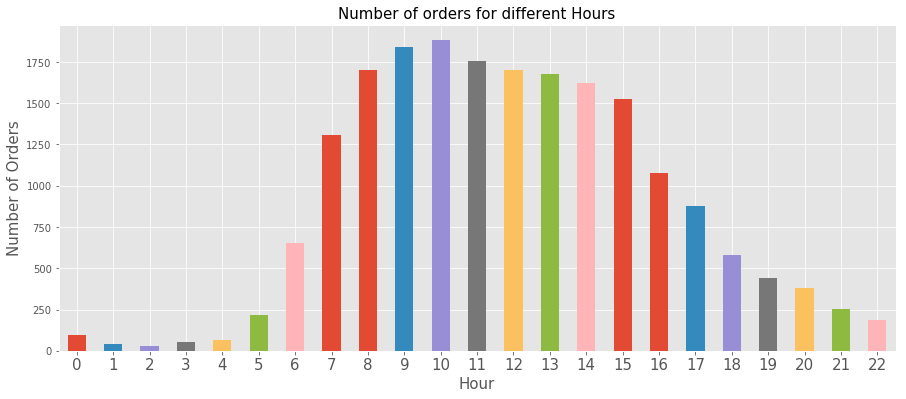

In [35]:
ax = df_new.groupby('bill_no')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(0,23), rotation='horizontal', fontsize=15)
plt.show()

# Discover patterns for each City

In [36]:
df_new.head()

,Service Work Order Number,city,report_dt,actual_strt_dt,plan_fnsh_dt,actual_fnsh_dt,order_desc,asset_req,year_month,month,day,hour,bill_no,bill_dt,serv_contract,bill_amt
0,A-1001,Sejwegca,2018-09-18 08:47:54,2018-09-19 11:48:54,2018-09-25 11:48:00,2018-09-22 12:36:43,Plumbing,Y,201809,9,2,8,IFS-100001,2018-09-22 12:36:43,414,1405.0
1,A-1002,Jipuri,2018-09-27 09:03:56,2018-09-28 09:58:23,2018-10-04 09:58:00,2018-10-04 12:24:50,Others,N,201809,9,4,9,IFS-100002,2018-10-04 12:24:50,415,1016.0
2,A-1003,Uhezufen,2018-09-27 07:16:17,2018-09-28 09:59:16,2018-10-04 09:59:00,2018-10-02 09:57:55,Others,N,201809,9,4,7,IFS-100003,2018-10-02 09:57:55,416,2869.0
3,A-1004,Heisla,2018-09-27 08:40:41,2018-09-28 10:04:22,2018-10-04 10:04:00,2018-10-02 13:30:18,Masonry,Y,201809,9,4,8,IFS-100004,2018-10-02 13:30:18,417,1374.0
4,A-1005,Vijipab,2018-09-27 08:33:28,2018-09-28 10:12:44,2018-10-04 10:12:00,2018-10-04 10:15:10,Masonry,N,201809,9,4,8,IFS-100005,2018-10-04 10:15:10,418,738.0


## How much money spent by each city?

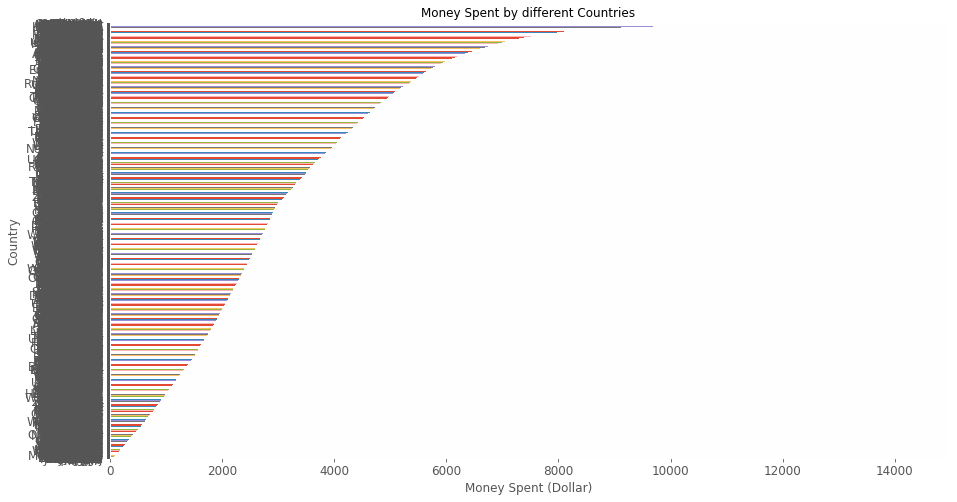

In [37]:
group_country_amount_spent = df_new.groupby('city')['bill_amt'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## Categorical variables - Feature engineering.

In [38]:
df_new.asset_req.nunique(),df_new.order_desc.nunique()

(2, 6)

In [39]:
order_desc_freq=pd.crosstab(index=df_new['order_desc'],columns="count")  
order_desc_freq_rel = order_desc_freq/order_desc_freq.sum() 
order_desc_freq_rel.sort_values('count', ascending=False) #relative frequencies

col_0,count
order_desc,
Plumbing,0.18750
Electrical,0.17790
Air Conditioning,0.17310
Others,0.16855
Telecom,0.16710
Masonry,0.12585


In [40]:
def order_desc_categorizer(row):
   row = str(row)
   category = ""
   if "Plumbing" in row:
       category = 6
   elif "Electrical" in row:
       category = 5
   elif "Air Conditioning" in row:
       category = 4
   elif "Others" in row:
       category = 3
   elif "Telecom" in row:
       category = 2
   else:
       category = 1
   return category 

df_new["order_desc"] = df_new.apply(lambda row:order_desc_categorizer(row["order_desc"]),axis=1)

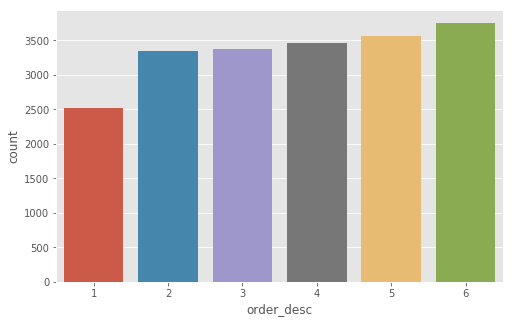

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.countplot(df_new["order_desc"])

* we can see that the max no. of services required were of "Plumbing" and the least were of "Masonry".

In [42]:
df_new['asset_req'] = np.where(df_new['asset_req']=='Y', '1', '0')
df_new['asset_req'] = df_new['asset_req'].astype(dtype='int64')

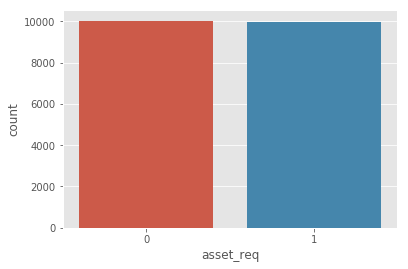

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
sns.countplot(df_new["asset_req"])

* we can see that the no. of times an extra equipment is required in services from central office is lower than the no. of times they are not required. 

In [44]:
df_new['time_to_repair']=df_new['actual_fnsh_dt']-df_new['actual_strt_dt']

In [45]:
df_new.time_to_repair.nunique()

19247

In [46]:
df_new['time_to_repair'].describe()

count                     20000
mean     3 days 10:41:50.947650
std      1 days 17:16:08.610893
min             0 days 00:17:26
25%             1 days 23:59:37
50%             3 days 08:15:40
75%             4 days 23:54:51
max             6 days 23:19:16
Name: time_to_repair, dtype: object

In [47]:
df_new['response_time']=df_new['actual_strt_dt']-df_new['report_dt']

In [48]:
df_new.response_time.nunique()

17273

In [49]:
df_new['response_time'].describe()

count                     20000
mean     0 days 23:44:20.838650
std      0 days 05:31:45.460328
min             0 days 01:02:06
25%             0 days 20:04:27
50%      0 days 23:52:09.500000
75%      1 days 03:33:42.250000
max             1 days 22:40:49
Name: response_time, dtype: object

## Results obtained from Exploratory Data Analysis (EDA)

1. The maximum no. of orders that the customers had made were 6.(i.e. all the 6 services from the company)
2. The customer with the highest money spent on purchases comes from "Wizneev" city.
3. Top 5 cities spending highest amount of money are as below:
    * Wizneev	
    * Wukpeovu	
    * Keefom	
    * Dunonoc	
    * Zarublic
4. December 2018 has the maximun service orders
5. November 2018 has neglible service orders
6. Services on Mondays are max. whereas on Saturday they're the least.
7. The company receives the highest number of orders at 12:00 noon and starts decreasing afterward in a day.
8. The company receives the highest number of orders for "Plumbing" services and least for "Masonry" services.
9. The response time of company ranges from 1 hr to 46 hrs.
10. The repairing time of company averages around 3 days and 8 hrs.
11. The requirement of spare parts/equipments from central office is required approx. 49% of cases. 